In [ ]:
1. how to check the normality of the data
2. z test
3. t test
4. chi sqaure test
5. anova test

In [12]:
#import the dataset
import pandas as pd
data=pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv",sep=';')

In [13]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
data["volatile acidity"]

0       0.700
1       0.880
2       0.760
3       0.280
4       0.700
        ...  
1594    0.600
1595    0.550
1596    0.510
1597    0.645
1598    0.310
Name: volatile acidity, Length: 1599, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_6444\2528970048.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['volatile acidity'],kde=True)


<AxesSubplot: xlabel='volatile acidity', ylabel='Density'>

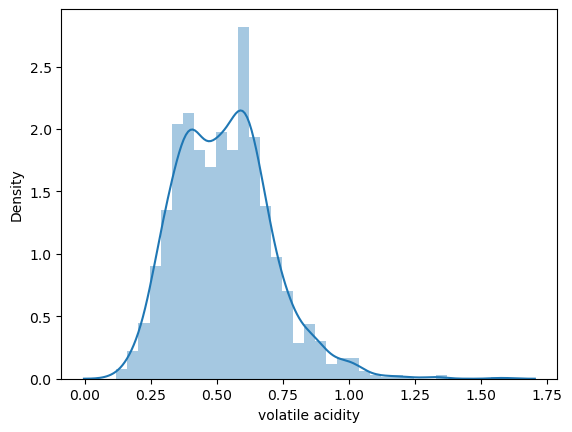

In [15]:
import seaborn as sns
sns.distplot(data['volatile acidity'],kde=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_6444\1758590136.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["citric acid"],kde=True,color="purple")


<AxesSubplot: xlabel='citric acid', ylabel='Density'>

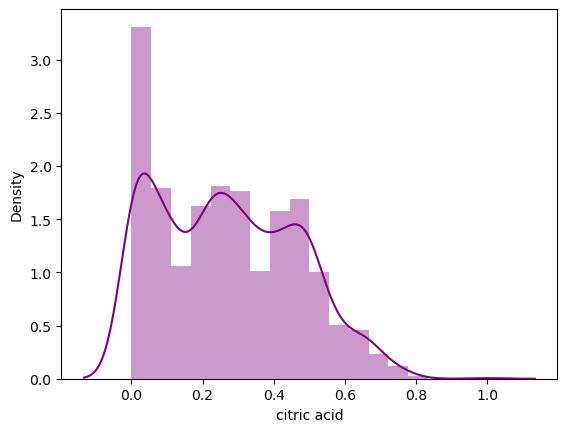

In [16]:
sns.distplot(data["citric acid"],kde=True,color="purple")

In [17]:
from scipy import stats
stats.shapiro(data['volatile acidity'])

ShapiroResult(statistic=0.9743338823318481, pvalue=2.686385373947307e-16)

In [18]:
stats.shapiro(data['citric acid'])

ShapiroResult(statistic=0.955294668674469, pvalue=1.0233944777578548e-21)

In [ ]:
p<0.05

In [19]:
from numpy.random import randn
mydata=randn(500)

C:\Users\HP\AppData\Local\Temp\ipykernel_6444\2291235163.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mydata,color='orange')


<AxesSubplot: ylabel='Density'>

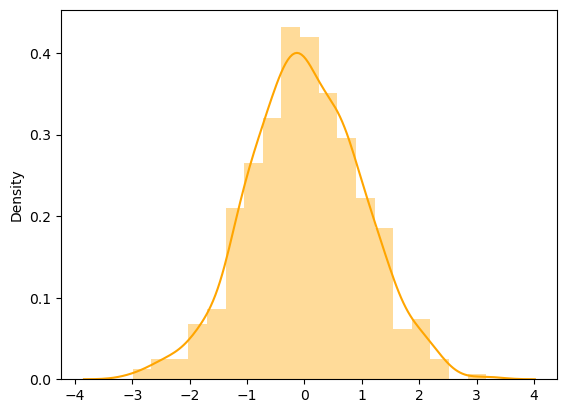

In [20]:
sns.distplot(mydata,color='orange')

In [21]:
result = stats.shapiro(mydata)

In [22]:
result

ShapiroResult(statistic=0.9982794523239136, pvalue=0.9056605100631714)

# what is my null hyphothesis?

# null hypothesis that the data was drawn from a normal distribution.

In [ ]:
if p<=result[1]:
    print("reject the null hypothesis")
else:
    print("accept the null hypothesis")

In [23]:
from scipy import stats
stats.normaltest(data['citric acid'])

NormaltestResult(statistic=152.039214793795, pvalue=9.662822259281018e-34)

In [24]:
stats.normaltest(mydata)

NormaltestResult(statistic=0.13394698157496998, pvalue=0.9352199929537135)

In [25]:
sample_mean_iq=110
alpha=0.05
#ci = 95%

In [26]:
mean_std_dev=15
mean_population=100

In [27]:
mean_std_dev*randn(50)+sample_mean_iq

array([121.77475665, 100.56932283, 108.10641317, 107.33647316,
       141.48174926,  85.25960234, 130.24819096, 102.85227836,
       101.34140503, 119.22649974, 118.64646491, 102.36029544,
        73.62814956,  92.73050219,  84.67389259,  83.06457014,
       133.71879333, 108.233528  , 115.02617795, 133.02251743,
       100.25511579, 118.05057144, 111.29772089, 118.77315548,
       108.41529577,  89.21329025, 127.44706918, 100.86703996,
       119.57284369,  98.64989887,  90.3631746 ,  82.97369211,
       129.99733527, 135.41494234, 124.34584204, 109.09671615,
        96.11739125, 116.30788382,  99.51381253, 101.85568274,
       104.42384828,  87.95838565, 122.26038762,  75.85377282,
        87.54051983,  83.69439196, 134.55375066,  85.65718374,
       101.46156397, 120.20056262])

In [28]:
data=mean_std_dev*randn(50)+mean_population

In [29]:
import numpy as np
np.mean(data)

98.20901584247022

In [30]:
np.std(data)

13.620677832900299

In [31]:
null_hyphothesis_value=100

In [32]:
from statsmodels.stats.weightstats import ztest
ztest(data,value=null_hyphothesis_value,alternative='larger')

(-0.9204306317579879, 0.8213261162755456)

In [33]:
data

array([ 91.36138086,  85.04992469,  81.55698248,  77.15157598,
       112.8244055 , 103.75167256,  92.59574048, 101.55186384,
       104.03463167, 100.74774707, 105.19179793, 116.33875518,
       116.9701916 , 100.01590819,  91.25432632,  93.16194005,
        91.62928462, 114.21931858, 109.29436056,  89.51412321,
       107.53512592, 108.26681122, 115.32687163,  99.15306252,
       119.47042556,  82.35188245,  80.06464192, 100.02601313,
        82.37407408, 113.0111366 ,  78.04181466,  88.40131624,
       122.72271653,  97.57222711,  88.51480303, 121.43742587,
        91.73044689, 104.18314249,  78.07215931,  87.76799272,
       111.24444589, 108.20194926,  81.47352689, 101.91026452,
       101.33482562, 101.01218729,  82.82250945,  63.34828438,
       116.97570718,  97.88707041])

In [34]:
#t_test

In [ ]:
#ztest vs t test
sample size less than 30
pop var/pop std won't be there

In [ ]:
one-sample t test(with respect to one independent sample)
two-sample t test(with respect to two independent sample)
paired t-test(two sample from the sample population on different time interval)

In [35]:
import random
np.random.randint(10,50,50)

array([38, 39, 41, 27, 47, 42, 16, 20, 49, 10, 37, 48, 14, 44, 35, 42, 19,
       21, 49, 30, 38, 12, 29, 46, 47, 40, 25, 27, 13, 49, 13, 21, 13, 17,
       11, 15, 26, 12, 34, 41, 39, 27, 46, 49, 20, 10, 49, 43, 28, 23])

In [36]:
population=np.random.randint(10,50,50)

In [37]:
sample1=np.random.choice(population,20)

In [38]:
sample1

array([48, 21, 36, 19, 27, 22, 28, 10, 11, 11, 11, 30, 34, 31, 17, 11, 11,
       19, 42, 10])

In [39]:
sample1.mean()

22.45

In [40]:
sample2=np.random.choice(population,20)

In [41]:
sample2

array([14, 47, 19, 18, 21, 30, 47, 16, 41, 32, 11, 19, 10, 43, 18, 16, 18,
       30, 46, 42])

In [42]:
sample2.mean()

26.9

In [43]:
my_cricket_score=[22, 38, 19, 15, 48, 11, 10, 49, 47, 38, 10, 25, 46, 10, 21, 24, 29,36, 25, 24]

In [44]:
np.mean(my_cricket_score)

27.35

In [ ]:
null_hyphothesis=sample mean should be 27.35

In [47]:
virat_cricket_score=[33, 45, 23, 25, 46, 46, 46, 49, 49, 14, 14, 44, 25, 31, 25, 40, 30,20, 42, 37]

In [48]:
(sum(virat_cricket_score))/len(virat_cricket_score)

34.2

In [49]:
np.mean(virat_cricket_score)

34.2

In [50]:
import scipy
result=scipy.stats.ttest_1samp(my_cricket_score,15)

In [51]:
result[1]

0.0005939030580482863

In [ ]:
# we are going to reject the null hyphothesis
p_value<=0.05

In [ ]:
#if P_value we are going to accept the null hyphgothesis
p_value>0.05

In [52]:
scipy.stats.ttest_1samp(my_cricket_score,27)

TtestResult(statistic=0.11652110620241571, pvalue=0.9084623785416333, df=19)

In [53]:
#two-sample t test(with respect to two independent sample)
my_cricket_score=[22, 38, 19, 15, 48, 11, 10, 49, 47, 38, 10, 25, 46, 10, 21, 24, 29,36, 25, 24]
virat_cricket_score=[33, 45, 23, 25, 46, 46, 46, 49, 49, 44, 44, 49, 25, 31, 25, 40, 30,20, 42, 37]

In [54]:
first_sample_mean=np.mean(my_cricket_score)
second_sample_mean=np.mean(virat_cricket_score)

In [55]:
print(first_sample_mean)
print(second_sample_mean)

27.35
37.45


In [ ]:
my_null_hyphothsis=both sample mean will be same

In [56]:
scipy.stats.ttest_ind(my_cricket_score,virat_cricket_score)

Ttest_indResult(statistic=-2.7009890879565885, pvalue=0.010269464981935)

In [ ]:
# we are going to reject the null hyphothesis
p_value<=0.05
#if P_value we are going to accept the null hyphgothesis
p_value>0.05

In [57]:
#paired t-test(two sample from the sample population on different time interval)
my_cricket_score_from_first_inning=[22, 38, 19, 15, 48, 11, 10, 49, 47, 38, 10, 25, 46, 10, 21, 24, 29,36, 25, 24]
my_cricket_score_from_second_inning=[22, 38, 29, 15, 18, 11, 10, 49, 47, 38, 50, 45, 46, 40, 21, 24, 29,16, 25, 24]

In [58]:
print(np.mean(my_cricket_score_from_first_inning))
print(np.mean(my_cricket_score_from_second_inning))

27.35
29.85


In [59]:
scipy.stats.ttest_rel(my_cricket_score_from_first_inning,my_cricket_score_from_second_inning)

TtestResult(statistic=-0.7542295906745516, pvalue=0.45995773816634733, df=19)

# CHI-SQUARE TEST

In [60]:
import seaborn as sns
dataset = sns.load_dataset('tips')

In [61]:
dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [63]:
dataset.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [64]:
dataset[['sex','smoker']]

,sex,smoker
0,Female,No
1,Male,No
2,Male,No
3,Male,No
4,Female,No
...,...,...
239,Male,No
240,Female,Yes
241,Male,Yes
242,Male,No


In [65]:
import pandas as pd

In [72]:
dataset_table=pd.crosstab(dataset['sex'],dataset['smoker'])

In [111]:
Observed_Values=dataset_table.values

In [112]:
Observed_Values

array([[60, 97],
       [33, 54]], dtype=int64)

In [113]:
print(f"observed value(real value) \n {Observed_Values}")

observed value(real value) 
 [[60 97]
 [33 54]]


In [85]:
import scipy.stats as stats

In [87]:
stats_test,p,dof,Expected_Values=stats.chi2_contingency(dataset_array)

In [88]:
p

1.0

In [89]:
Expected_Values

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [93]:
no_of_rows=dataset_table.iloc[0:2,0]

In [104]:
len(no_of_rows)

sex
Male      60
Female    33
Name: Yes, dtype: int64

In [91]:
dataset_table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [100]:
no_of_columns=dataset_table.iloc[0,0:2]

In [105]:
len(no_of_columns)

smoker
Yes    60
No     97
Name: Male, dtype: int64

In [106]:
dof=(len(no_of_columns)-1)*(len(no_of_rows)-1)

In [107]:
dof

1

In [114]:
from scipy.stats import chi2
chisqure_test=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)]) 

In [115]:
chisqure_test

array([0.00119737, 0.00073745])

In [116]:
chi_square_statistic=chisqure_test[0]+chisqure_test[1]

In [117]:
chi_square_statistic

0.001934818536627623

In [119]:
for o,e in zip(Observed_Values,Expected_Values):
    print(o,e)

[60 97] [59.84016393 97.15983607]
[33 54] [33.15983607 53.84016393]


In [120]:
alpha=0.05

In [121]:
dof

1

In [122]:
from scipy.stats import chi2
critical_value=chi2.ppf(1-alpha,df=dof)

In [123]:
critical_value

3.841458820694124

In [124]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables


In [125]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=dof)

In [126]:
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables
